In [45]:
## 1. Comprensión del negocio

# ¿Qué problema queremos resolver?
# Investigar si existe una correlación entre el tiempo en pantalla y variables asociadas a la salud mental (estrés, ansiedad, depresión).

# ¿Quiénes se beneficiarían?
# Instituciones educativas, padres, psicólogos, entidades de salud pública.

# ¿Qué preguntas queremos responder?
# ¿Cuánto tiempo frente a pantallas se considera perjudicial?
# ¿Qué tipo de uso (ocio, trabajo, redes sociales) impacta más?

In [46]:
#imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
## 2. Comprensión de los datos
##2.1 Carga de datos y limpieza de datos

# Carga del dataset
df = pd.read_csv('/home/marast/Documentos/1UNIVALLE/7 SEMESTRE/ICD/Impact-of-Screen-Time-on-Mental-Health/data/digital_diet_mental_health.csv')




In [48]:
display(df.head(5))
print(df.info())
print(df.describe())
print("\n", df.shape)

,user_id,age,gender,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,...,stress_level,physical_activity_hours_per_week,location_type,mental_health_score,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day
0,user_1,51,Female,4.8,3.4,1.3,1.6,1.6,4.1,2.0,...,10,0.7,Urban,32,1,1,125.2,13,15,4.0
1,user_2,64,Male,3.9,3.5,1.8,0.9,2.0,2.7,3.1,...,6,4.3,Suburban,75,0,1,150.4,19,18,6.5
2,user_3,41,Other,10.5,2.1,2.6,0.7,2.2,3.0,2.8,...,5,3.1,Suburban,22,0,0,187.9,7,3,6.9
3,user_4,27,Other,8.8,0.0,0.0,0.7,2.5,3.3,1.6,...,5,0.0,Rural,22,0,1,73.6,7,2,4.8
4,user_5,55,Male,5.9,1.7,1.1,1.5,1.6,1.1,3.6,...,7,3.0,Urban,64,1,1,217.5,8,10,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   user_id                           2000 non-null   object 
 1   age                               2000 non-null   int64  
 2   gender                            2000 non-null   object 
 3   daily_screen_time_hours           2000 non-null   float64
 4   phone_usage_hours                 2000 non-null   float64
 5   laptop_usage_hours                2000 non-null   float64
 6   tablet_usage_hours                2000 non-null   float64
 7   tv_usage_hours                    2000 non-null   float64
 8   social_media_hours                2000 non-null   float64
 9   work_related_hours                2000 non-null   float64
 10  entertainment_hours               2000 non-null   float64
 11  gaming_hours                      2000 non-null   float64
 12  sleep_

<Axes: >

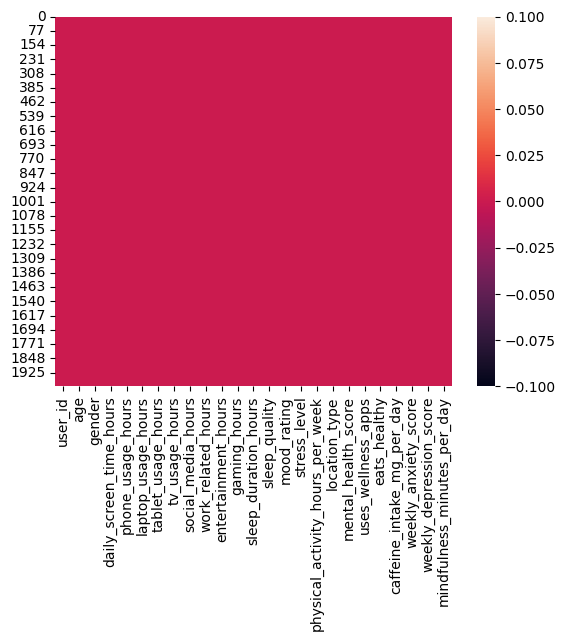

In [49]:
sns.heatmap(df.isnull())


In [50]:
##2.2. Análisis Descriptivo


In [51]:
##2.2.1 Analisis Strings

In [52]:
df.select_dtypes('object').columns


Index(['user_id', 'gender', 'location_type'], dtype='object')

location_type
Urban       999
Suburban    605
Rural       396
Name: count, dtype: int64


/tmp/ipykernel_117866/3859410590.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='location_type', data=df, palette='flare')


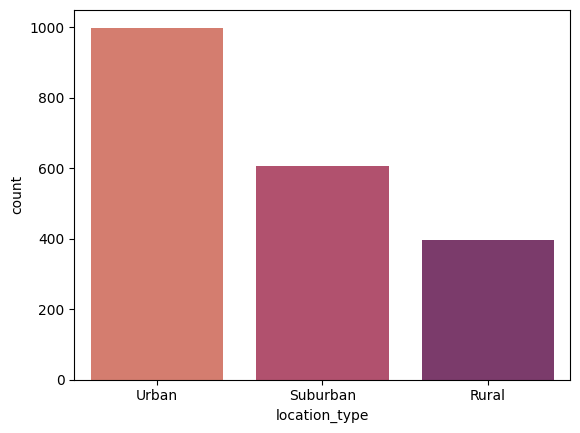

In [53]:
print(df['location_type'].value_counts())
sns.countplot(x='location_type', data=df, palette='flare')  
plt.show()

In [54]:
#Numbers

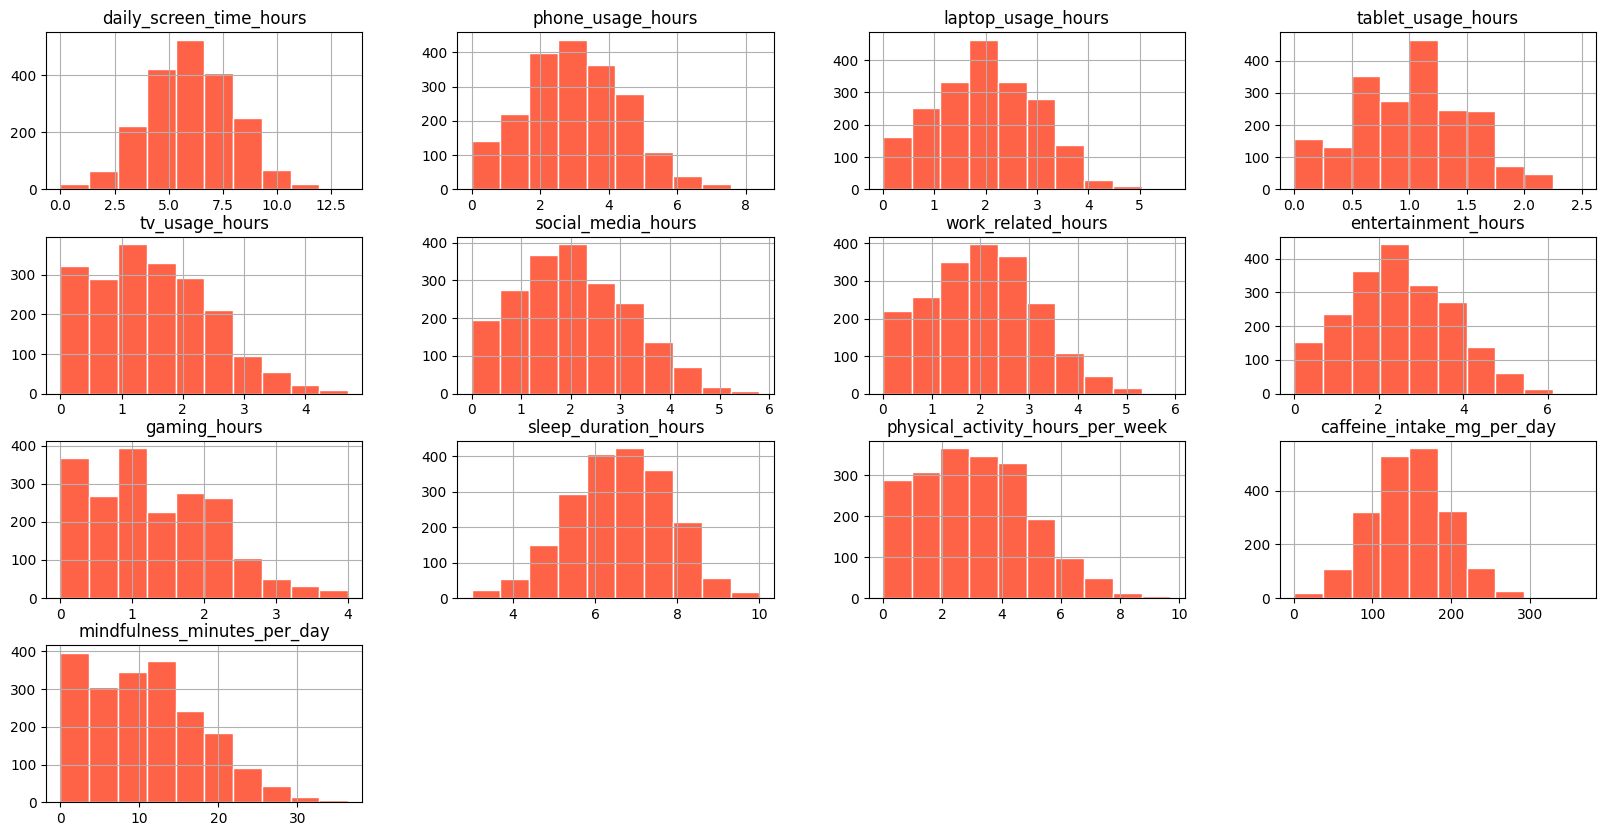

,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,entertainment_hours,gaming_hours,sleep_duration_hours,physical_activity_hours_per_week,caffeine_intake_mg_per_day,mindfulness_minutes_per_day
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.0000,2000.000000,2000.000000,2000.00000,2000.000000
mean,6.025600,3.023700,1.999950,0.995650,1.503700,2.039200,2.010250,2.46735,1.2795,6.537550,3.087150,148.07970,10.753750
std,1.974123,1.449399,0.997949,0.492714,0.959003,1.133435,1.116111,1.23686,0.8945,1.203856,1.885258,48.86066,7.340269
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,3.000000,0.000000,0.80000,0.000000
25%,4.700000,2.000000,1.300000,0.600000,0.800000,1.200000,1.200000,1.60000,0.6000,5.700000,1.600000,113.90000,4.900000
50%,6.000000,3.000000,2.000000,1.000000,1.500000,2.000000,2.000000,2.40000,1.2000,6.600000,3.000000,147.45000,10.400000
75%,7.325000,4.000000,2.700000,1.300000,2.200000,2.800000,2.800000,3.30000,1.9000,7.400000,4.400000,180.70000,15.800000
max,13.300000,8.400000,5.600000,2.500000,4.700000,5.800000,5.900000,6.80000,4.0000,10.000000,9.700000,364.90000,36.400000


In [55]:
numbers=df.select_dtypes('float64', 'int64').columns
df[numbers].hist(figsize=(20,10), color='#FF6347', edgecolor='white')

plt.show()
display(df[numbers].describe())

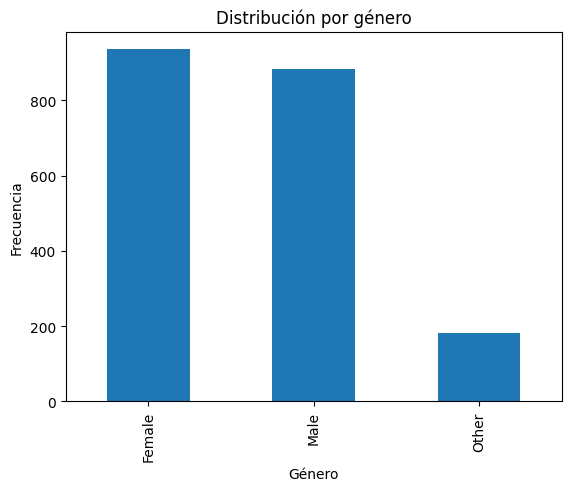

In [56]:
# Gráfica de barras para género
df['gender'].value_counts().plot(kind='bar')
plt.title('Distribución por género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

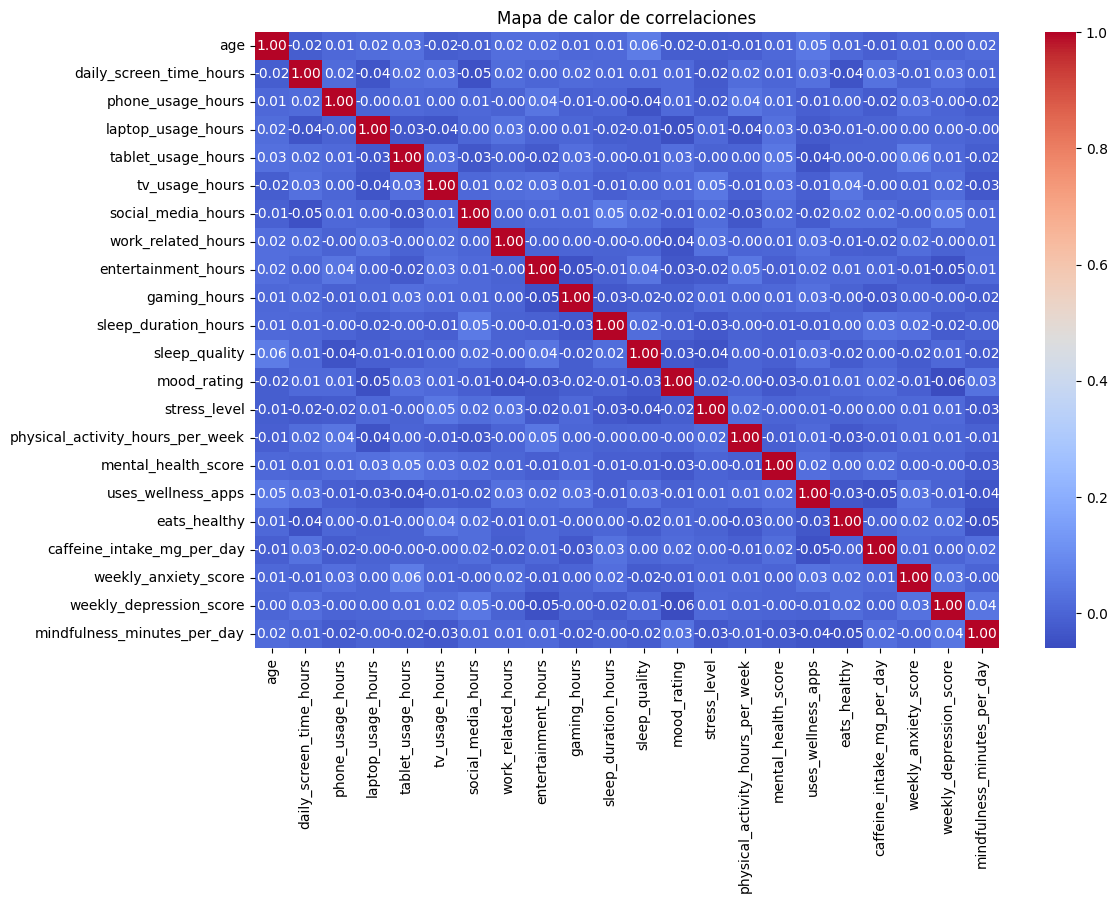

In [57]:
#Correlación solo entre variables numéricas
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()

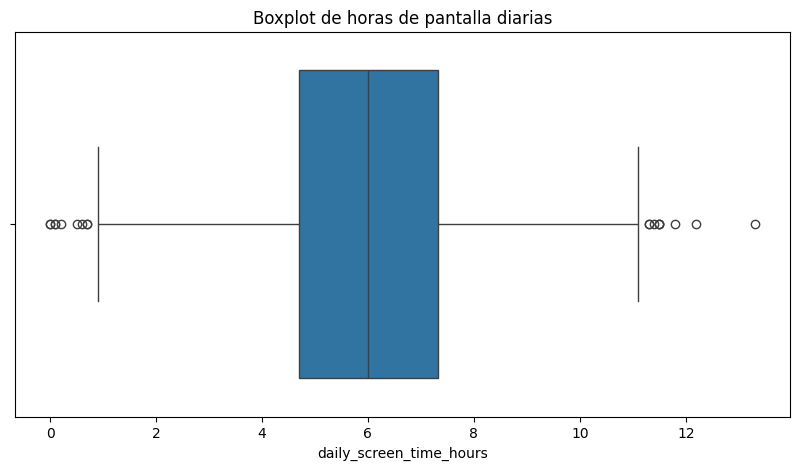

In [58]:
#Boxplot para outliers
plt.figure(figsize=(10,5))
sns.boxplot(x=df['daily_screen_time_hours'])
plt.title('Boxplot de horas de pantalla diarias')
plt.show()

In [59]:
# %% [markdown]
# ## 3. Tendencias por Grupo de Edad
# 
# Analizaremos cómo varía el tiempo de pantalla entre diferentes grupos de edad.


=== Tendencias por Grupo de Edad ===

Estadísticas de tiempo de pantalla por grupo de edad:


/tmp/ipykernel_117866/289252854.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_screen_time = df.groupby('age_group')['daily_screen_time_hours'].agg(['mean', 'median', 'std']).round(2)


,mean,median,std
age_group,,,
<18,6.11,6.1,2.07
18-29,5.98,6.0,1.85
30-44,6.14,6.1,1.99
45-59,5.96,5.9,2.00
60+,5.90,6.0,2.03


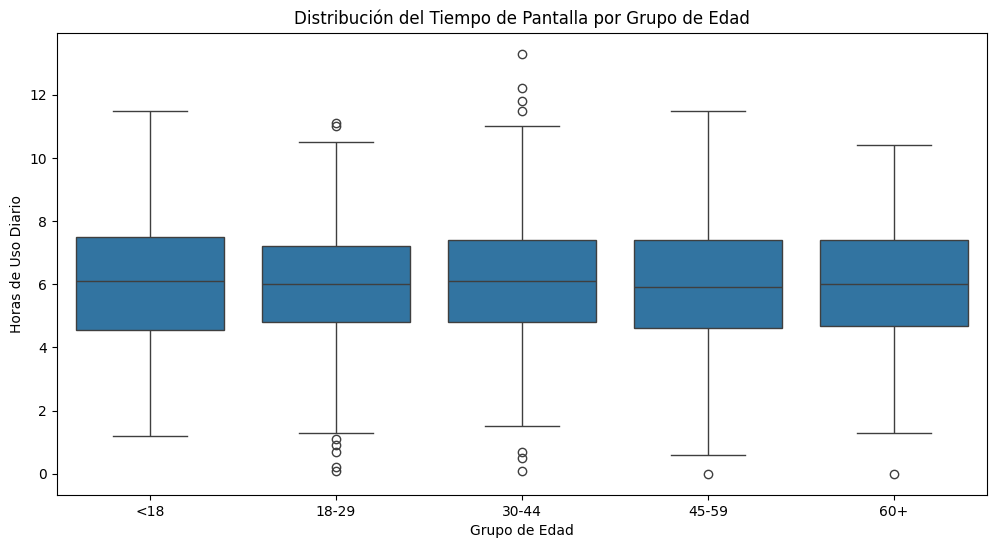

In [60]:
# Crear columna de grupo de edad si no existe
if 'age_group' not in df.columns:
	bins = [0, 18, 30, 45, 60, 100]
	labels = ['<18', '18-29', '30-44', '45-59', '60+']
	df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

print("=== Tendencias por Grupo de Edad ===")
age_screen_time = df.groupby('age_group')['daily_screen_time_hours'].agg(['mean', 'median', 'std']).round(2)
print("\nEstadísticas de tiempo de pantalla por grupo de edad:")
display(age_screen_time)

plt.figure(figsize=(12, 6))
sns.boxplot(x='age_group', y='daily_screen_time_hours', data=df)
plt.title('Distribución del Tiempo de Pantalla por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Horas de Uso Diario')
plt.show()

In [61]:
# %% [markdown]
# ## 4. Tendencias por Tipo de Ubicación
# 
# Examinaremos cómo el tipo de ubicación afecta el tiempo de pantalla.


=== Tendencias por Tipo de Ubicación ===

Estadísticas de tiempo de pantalla por tipo de ubicación:
               mean  median   std
location_type                    
Rural          6.28     6.3  2.06
Suburban       5.97     5.9  1.97
Urban          5.96     5.9  1.94


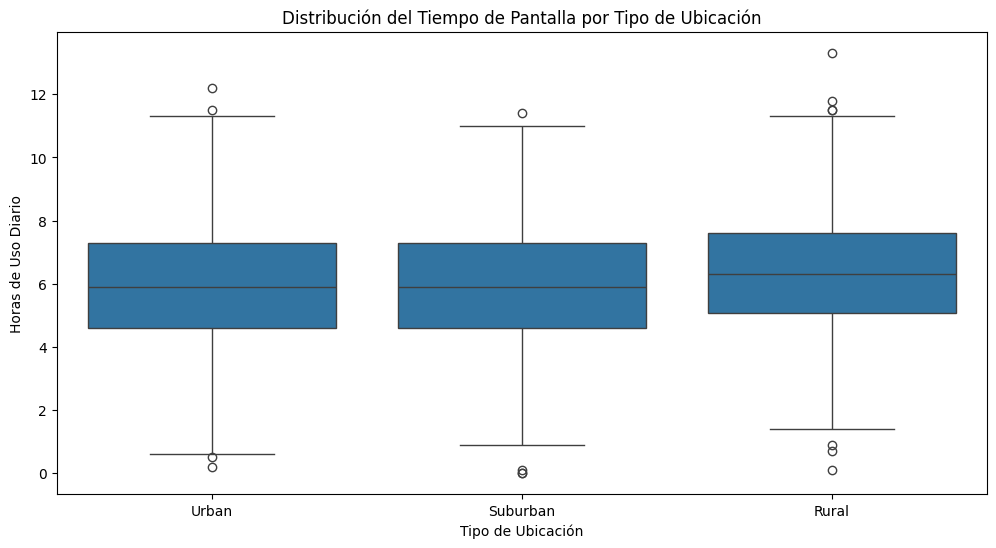

In [62]:
print("\n=== Tendencias por Tipo de Ubicación ===")
location_screen_time = df.groupby('location_type')['daily_screen_time_hours'].agg(['mean', 'median', 'std']).round(2)
print("\nEstadísticas de tiempo de pantalla por tipo de ubicación:")
print(location_screen_time)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='location_type', y='daily_screen_time_hours')
plt.title('Distribución del Tiempo de Pantalla por Tipo de Ubicación')
plt.xlabel('Tipo de Ubicación')
plt.ylabel('Horas de Uso Diario')
plt.show()

In [63]:
# %% [markdown]
# ## 5. Tendencias en Tipos de Uso de Pantalla
# 
# Analizaremos el uso de diferentes dispositivos por grupo de edad.


=== Tendencias en Tipos de Uso de Pantalla ===

Uso promedio de dispositivos por grupo de edad:
           phone_usage_hours  laptop_usage_hours  tablet_usage_hours  \
age_group                                                              
<18                     3.13                2.08                0.97   
18-29                   2.90                1.94                0.96   
30-44                   3.07                1.97                1.01   
45-59                   3.03                2.02                1.00   
60+                     3.05                2.08                1.03   

           tv_usage_hours  
age_group                  
<18                  1.40  
18-29                1.60  
30-44                1.49  
45-59                1.51  
60+                  1.43  


/tmp/ipykernel_117866/3187262564.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  screen_usage_by_age = df.groupby('age_group')[['phone_usage_hours', 'laptop_usage_hours',


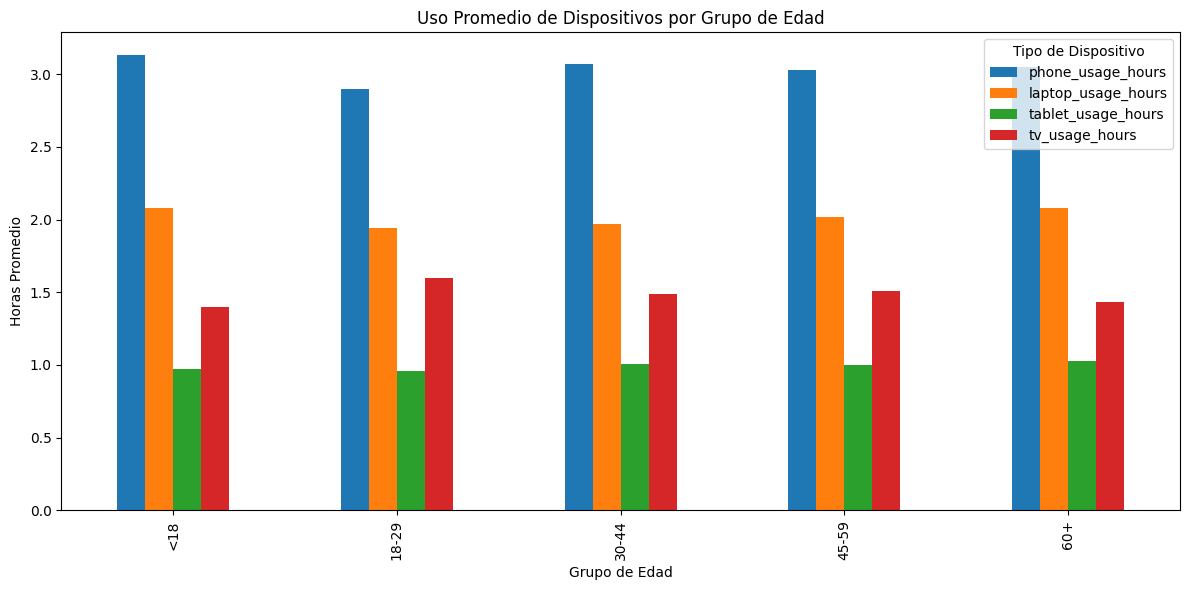

In [64]:
print("\n=== Tendencias en Tipos de Uso de Pantalla ===")
screen_usage_by_age = df.groupby('age_group')[['phone_usage_hours', 'laptop_usage_hours', 
                                              'tablet_usage_hours', 'tv_usage_hours']].mean().round(2)
print("\nUso promedio de dispositivos por grupo de edad:")
print(screen_usage_by_age)

screen_usage_by_age.plot(kind='bar', figsize=(12, 6))
plt.title('Uso Promedio de Dispositivos por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Horas Promedio')
plt.legend(title='Tipo de Dispositivo')
plt.tight_layout()
plt.show()

In [65]:
# %% [markdown]
# ## 6. Tendencias en Actividades en Pantalla
# 
# Examinaremos cómo varían las diferentes actividades en pantalla entre grupos de edad.


=== Tendencias en Actividades en Pantalla ===

Uso promedio de actividades por grupo de edad:
           social_media_hours  work_related_hours  entertainment_hours  \
age_group                                                                
<18                      1.92                1.97                 2.44   
18-29                    2.12                1.98                 2.41   
30-44                    2.07                2.03                 2.49   
45-59                    1.99                1.99                 2.46   
60+                      2.03                2.12                 2.57   

           gaming_hours  
age_group                
<18                1.26  
18-29              1.25  
30-44              1.32  
45-59              1.27  
60+                1.27  


/tmp/ipykernel_117866/3897533645.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  activities_by_age = df.groupby('age_group')[['social_media_hours', 'work_related_hours',


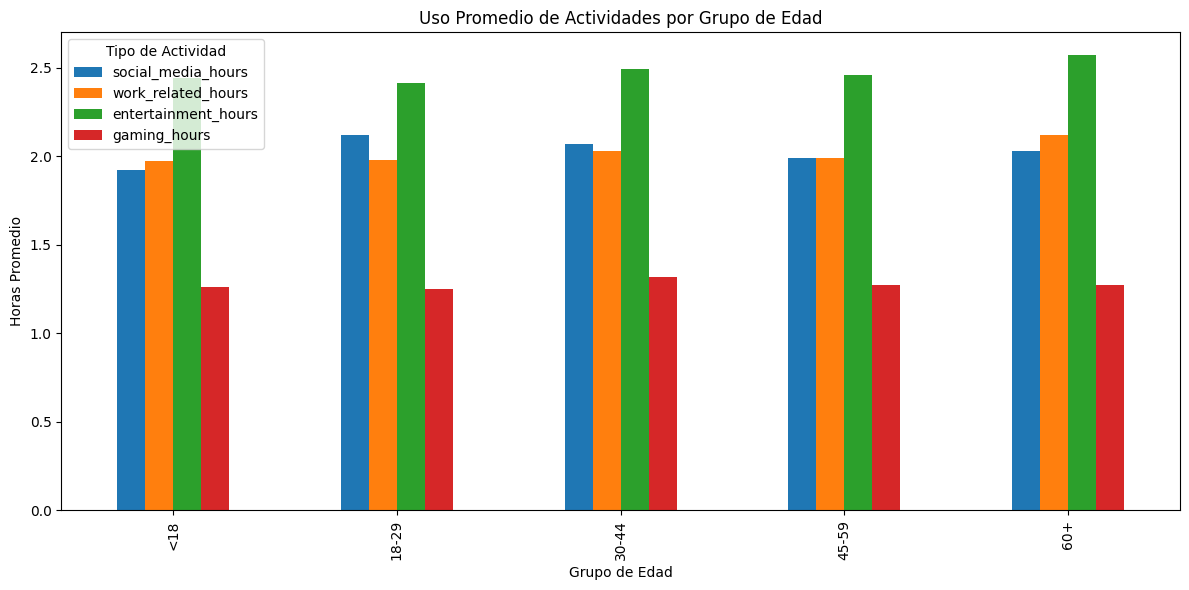

In [66]:
print("\n=== Tendencias en Actividades en Pantalla ===")
activities_by_age = df.groupby('age_group')[['social_media_hours', 'work_related_hours', 
                                           'entertainment_hours', 'gaming_hours']].mean().round(2)
print("\nUso promedio de actividades por grupo de edad:")
print(activities_by_age)

activities_by_age.plot(kind='bar', figsize=(12, 6))
plt.title('Uso Promedio de Actividades por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Horas Promedio')
plt.legend(title='Tipo de Actividad')
plt.tight_layout()
plt.show()


In [67]:
# %% [markdown]
# ## 7. Tendencias en Salud Mental
# 
# Analizaremos cómo varían los indicadores de salud mental entre grupos de edad.


=== Tendencias en Salud Mental ===

Estadísticas de salud mental por grupo de edad:
           mental_health_score  weekly_anxiety_score  weekly_depression_score
age_group                                                                    
<18                      48.92                  9.95                    10.41
18-29                    49.00                 10.08                    10.20
30-44                    50.38                  9.46                     9.77
45-59                    49.88                 10.27                     9.88
60+                      48.95                  9.50                    10.67


/tmp/ipykernel_117866/4266721443.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mental_health_by_age = df.groupby('age_group')[['mental_health_score', 'weekly_anxiety_score',


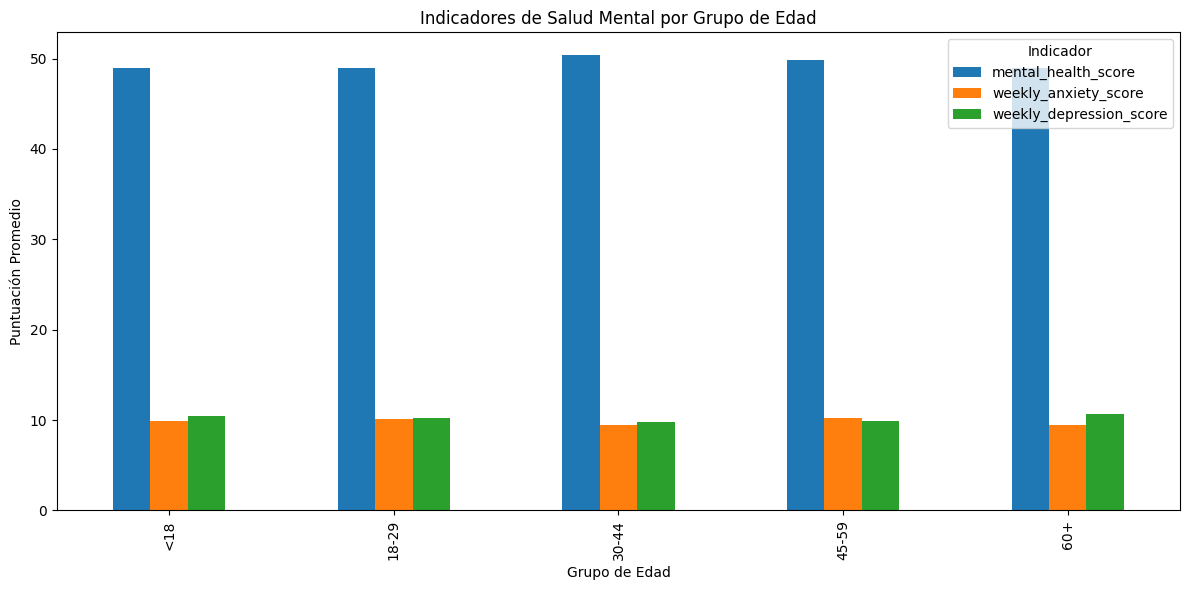

In [68]:
print("\n=== Tendencias en Salud Mental ===")
mental_health_by_age = df.groupby('age_group')[['mental_health_score', 'weekly_anxiety_score', 
                                              'weekly_depression_score']].mean().round(2)
print("\nEstadísticas de salud mental por grupo de edad:")
print(mental_health_by_age)

mental_health_by_age.plot(kind='bar', figsize=(12, 6))
plt.title('Indicadores de Salud Mental por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Puntuación Promedio')
plt.legend(title='Indicador')
plt.tight_layout()
plt.show()

In [69]:
# %% [markdown]
# ## 8. Resumen de Tendencias
# 
# Presentaremos un resumen de los hallazgos más importantes del análisis.

In [70]:
# %%
print("\n=== Resumen de Tendencias ===")

# Tendencias por Edad
print("\n1. Tendencias por Edad:")
age_trends = df.groupby('age_group')['daily_screen_time_hours'].mean().sort_values(ascending=False)
print(f"- El grupo de edad con mayor tiempo de pantalla es: {age_trends.index[0]} ({age_trends.iloc[0]:.2f} horas)")
print(f"- El grupo de edad con menor tiempo de pantalla es: {age_trends.index[-1]} ({age_trends.iloc[-1]:.2f} horas)")

# Tendencias por Ubicación
print("\n2. Tendencias por Ubicación:")
location_trends = df.groupby('location_type')['daily_screen_time_hours'].mean().sort_values(ascending=False)
print(f"- El tipo de ubicación con mayor tiempo de pantalla es: {location_trends.index[0]} ({location_trends.iloc[0]:.2f} horas)")
print(f"- El tipo de ubicación con menor tiempo de pantalla es: {location_trends.index[-1]} ({location_trends.iloc[-1]:.2f} horas)")

# Tendencias en Uso de Dispositivos
print("\n3. Tendencias en Uso de Dispositivos:")
device_trends = df[['phone_usage_hours', 'laptop_usage_hours', 'tablet_usage_hours', 'tv_usage_hours']].mean()
print(f"- El dispositivo más usado es: {device_trends.index[device_trends.argmax()]} ({device_trends.max():.2f} horas)")
print(f"- El dispositivo menos usado es: {device_trends.index[device_trends.argmin()]} ({device_trends.min():.2f} horas)")

# Tendencias en Actividades
print("\n4. Tendencias en Actividades:")
activity_trends = df[['social_media_hours', 'work_related_hours', 'entertainment_hours', 'gaming_hours']].mean()
print(f"- La actividad más común es: {activity_trends.index[activity_trends.argmax()]} ({activity_trends.max():.2f} horas)")
print(f"- La actividad menos común es: {activity_trends.index[activity_trends.argmin()]} ({activity_trends.min():.2f} horas)")

# Tendencias en Salud Mental
print("\n5. Tendencias en Salud Mental:")
mental_health_trends = df.groupby('age_group')['mental_health_score'].mean().sort_values(ascending=False)
print(f"- El grupo de edad con mejor salud mental es: {mental_health_trends.index[0]} ({mental_health_trends.iloc[0]:.2f} puntos)")
print(f"- El grupo de edad con peor salud mental es: {mental_health_trends.index[-1]} ({mental_health_trends.iloc[-1]:.2f} puntos)") 


=== Resumen de Tendencias ===

1. Tendencias por Edad:
- El grupo de edad con mayor tiempo de pantalla es: 30-44 (6.14 horas)
- El grupo de edad con menor tiempo de pantalla es: 60+ (5.90 horas)

2. Tendencias por Ubicación:
- El tipo de ubicación con mayor tiempo de pantalla es: Rural (6.28 horas)
- El tipo de ubicación con menor tiempo de pantalla es: Urban (5.96 horas)

3. Tendencias en Uso de Dispositivos:
- El dispositivo más usado es: phone_usage_hours (3.02 horas)
- El dispositivo menos usado es: tablet_usage_hours (1.00 horas)

4. Tendencias en Actividades:
- La actividad más común es: entertainment_hours (2.47 horas)
- La actividad menos común es: gaming_hours (1.28 horas)

5. Tendencias en Salud Mental:
- El grupo de edad con mejor salud mental es: 30-44 (50.38 puntos)
- El grupo de edad con peor salud mental es: <18 (48.92 puntos)


/tmp/ipykernel_117866/260564221.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_trends = df.groupby('age_group')['daily_screen_time_hours'].mean().sort_values(ascending=False)
/tmp/ipykernel_117866/260564221.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mental_health_trends = df.groupby('age_group')['mental_health_score'].mean().sort_values(ascending=False)


In [71]:
# %% [markdown]
# ## 3. Correlación General con Tiempo de Pantalla
# 
# Analizaremos la correlación entre el tiempo total de pantalla y otras variables importantes.

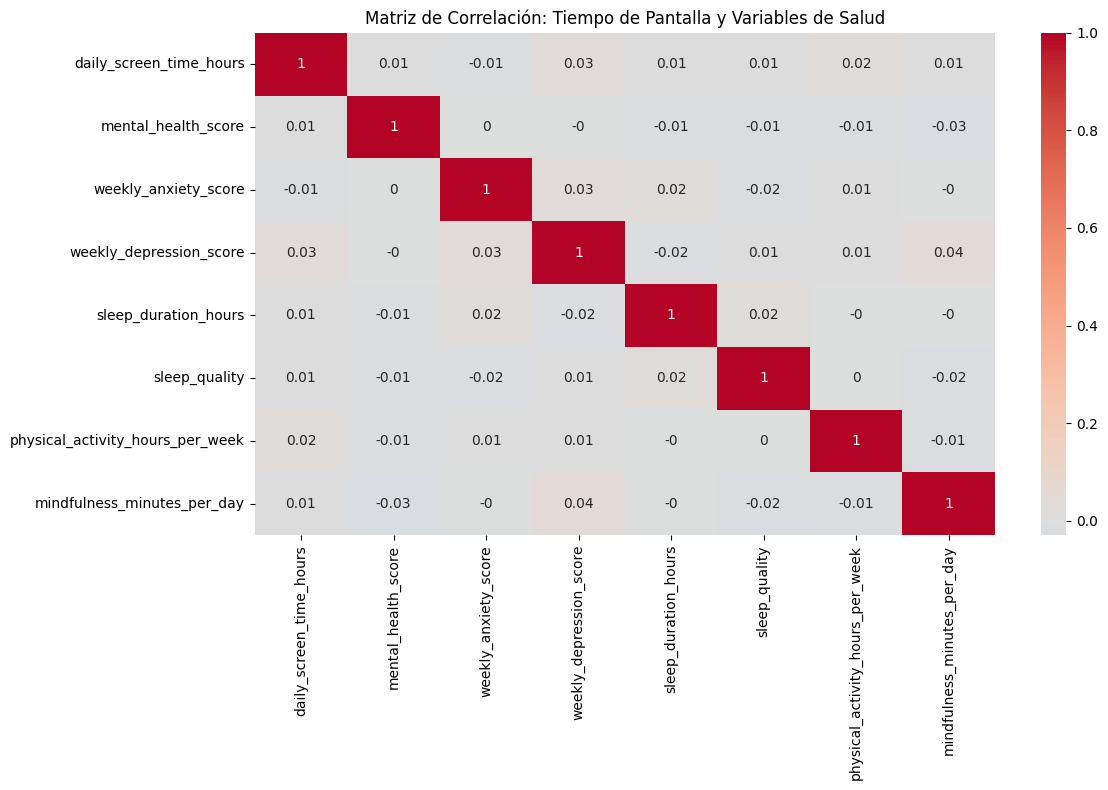

In [72]:
# Seleccionar variables relevantes para correlación
variables = ['daily_screen_time_hours', 'mental_health_score', 'weekly_anxiety_score', 
            'weekly_depression_score', 'sleep_duration_hours', 'sleep_quality',
            'physical_activity_hours_per_week', 'mindfulness_minutes_per_day']

# Calcular matriz de correlación
correlation_matrix = df[variables].corr().round(2)

# Visualizar matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación: Tiempo de Pantalla y Variables de Salud')
plt.tight_layout()
plt.show()

In [73]:
# %% [markdown]
# ## 4. Correlación por Tipo de Uso de Pantalla
# 
# Examinaremos cómo diferentes tipos de uso de pantalla se correlacionan con la salud mental.

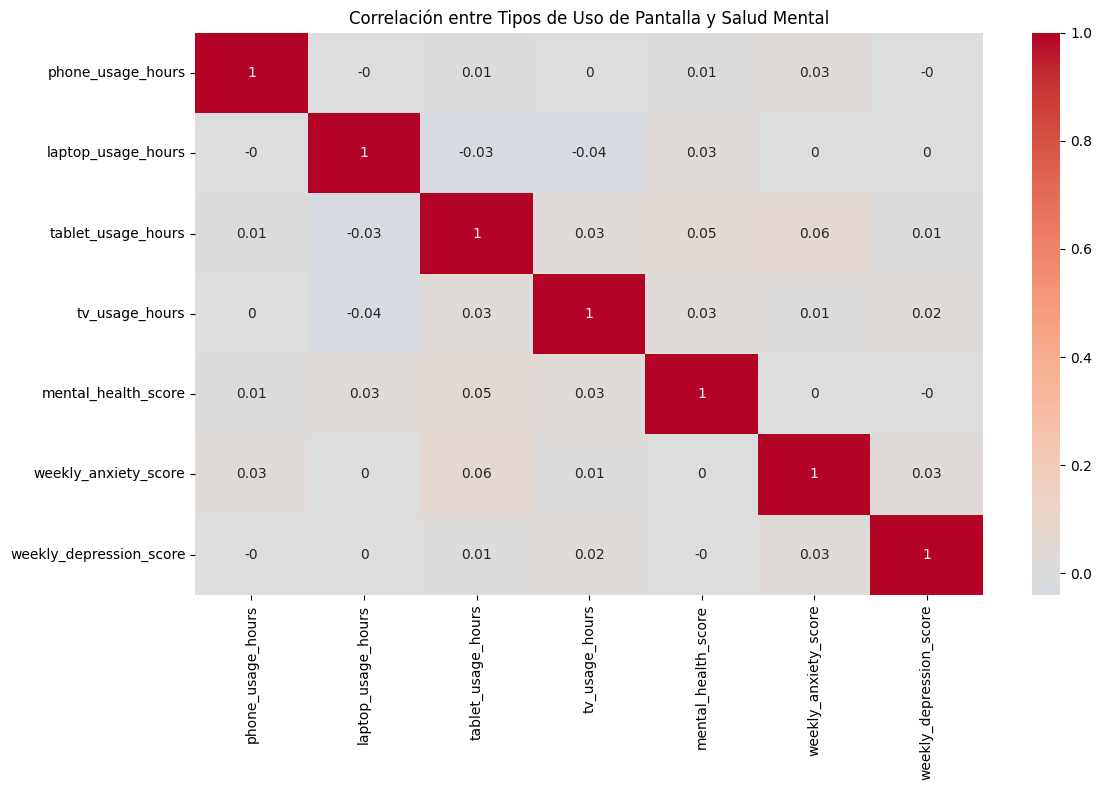

In [74]:
# Variables de uso de pantalla
screen_usage = ['phone_usage_hours', 'laptop_usage_hours', 'tablet_usage_hours', 'tv_usage_hours']
mental_health = ['mental_health_score', 'weekly_anxiety_score', 'weekly_depression_score']

# Calcular correlaciones
usage_correlations = df[screen_usage + mental_health].corr().round(2)

# Visualizar correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(usage_correlations, annot=True, cmap='coolwarm', center=0)
plt.title('Correlación entre Tipos de Uso de Pantalla y Salud Mental')
plt.tight_layout()
plt.show()


In [75]:
# ## 5. Correlación por Tipo de Actividad
# 
# Analizaremos cómo diferentes actividades en pantalla se correlacionan con la salud mental.

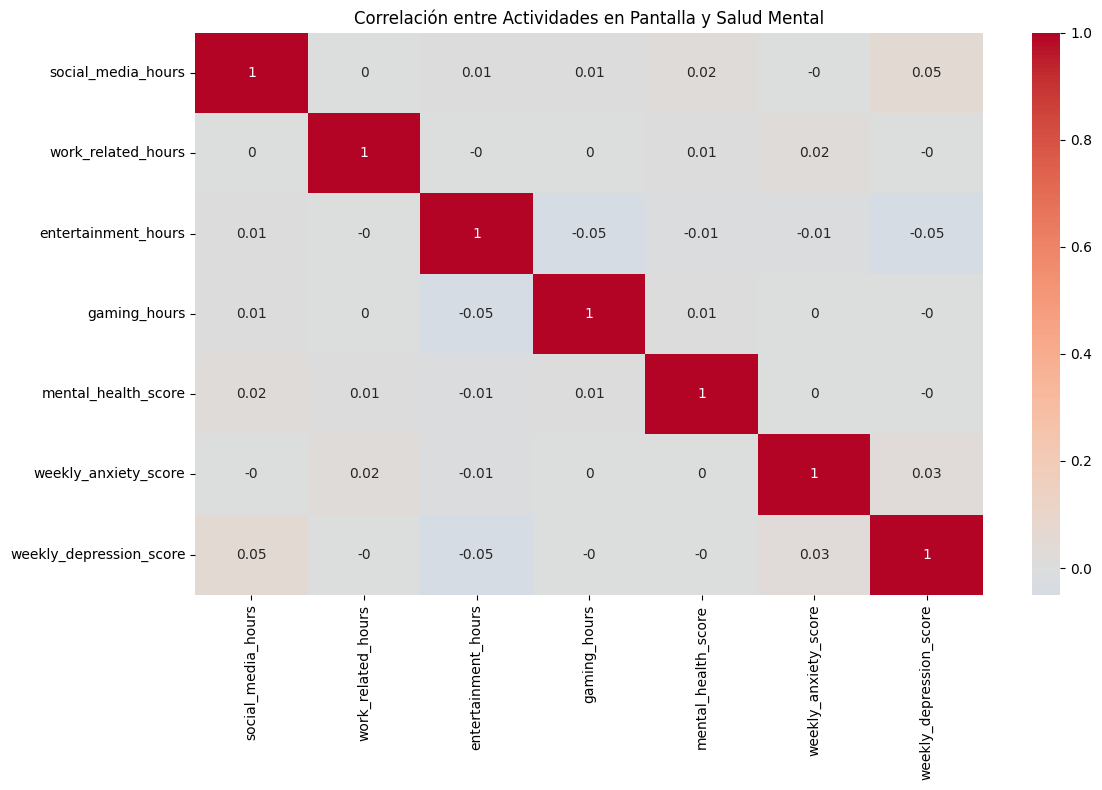

In [76]:
# Variables de actividades
activities = ['social_media_hours', 'work_related_hours', 'entertainment_hours', 'gaming_hours']

# Calcular correlaciones
activity_correlations = df[activities + mental_health].corr().round(2)

# Visualizar correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(activity_correlations, annot=True, cmap='coolwarm', center=0)
plt.title('Correlación entre Actividades en Pantalla y Salud Mental')
plt.tight_layout()
plt.show()

In [77]:
# %% [markdown]
# ## 6. Análisis de Correlación por Grupo de Edad
# 
# Examinaremos cómo varían las correlaciones entre diferentes grupos de edad.

/tmp/ipykernel_117866/2031128616.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_correlations = df.groupby('age_group').apply(correlation_by_group)
/tmp/ipykernel_117866/2031128616.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  age_group_correlations = df.groupby('age_group').apply(correlation_by_group)


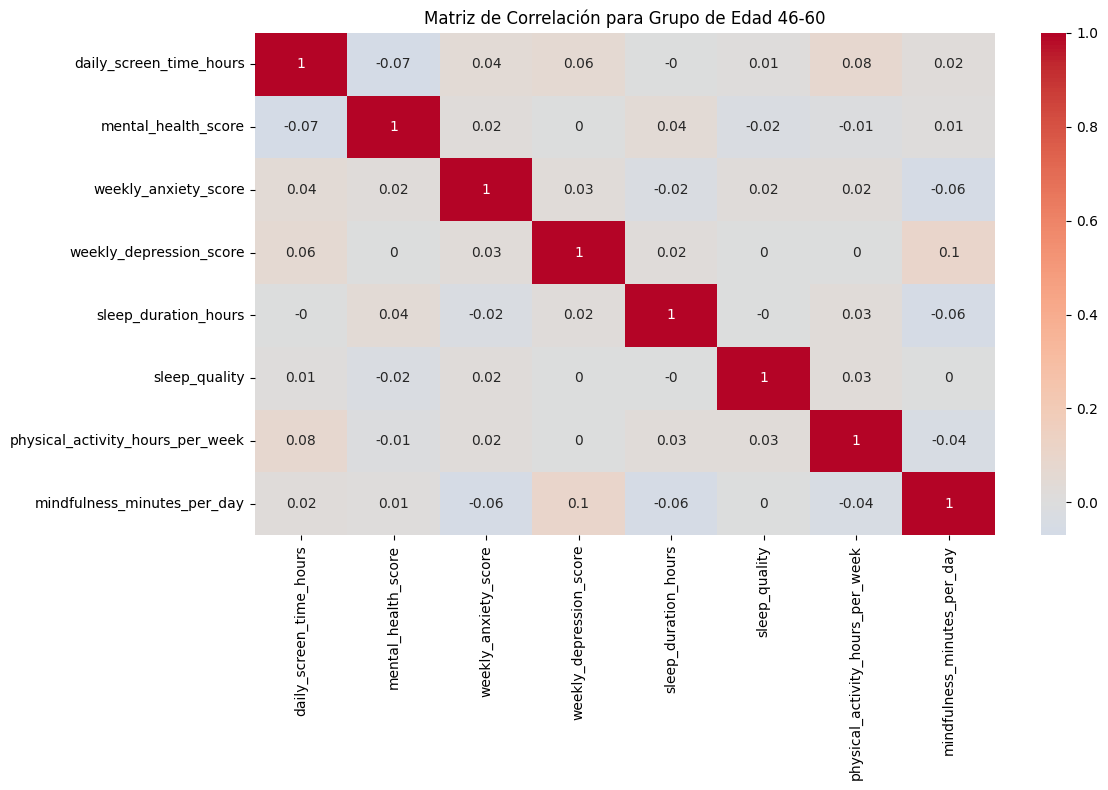

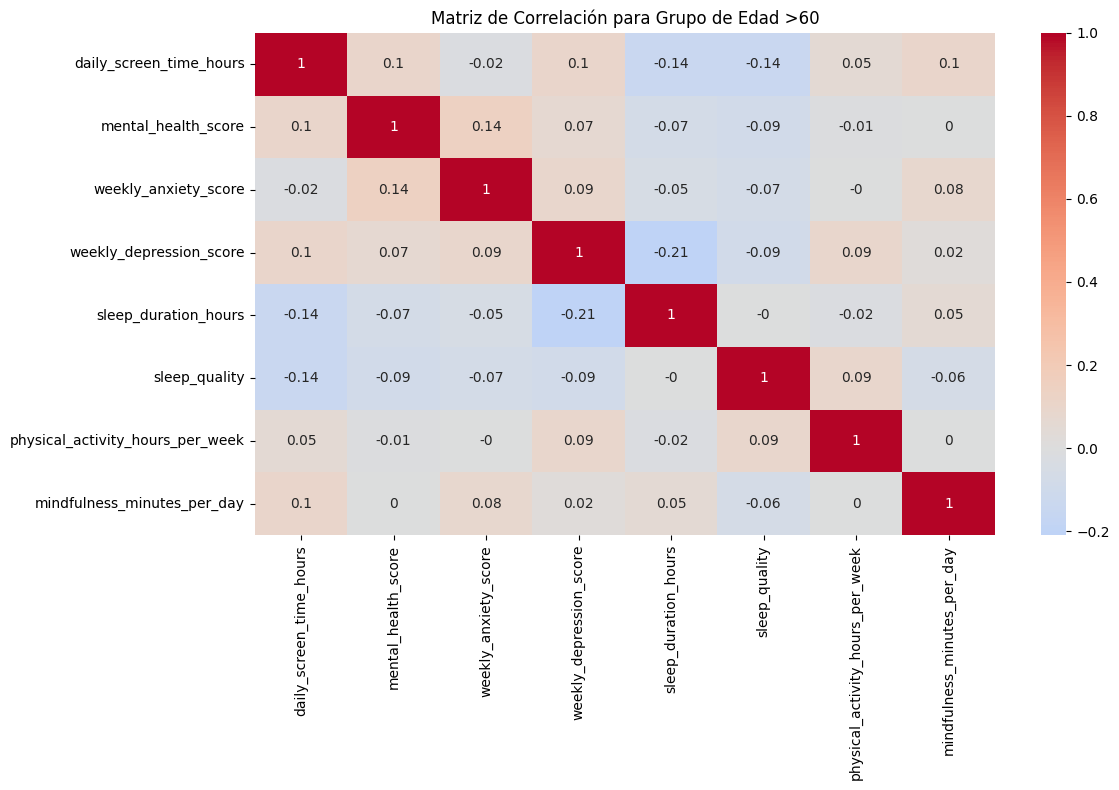

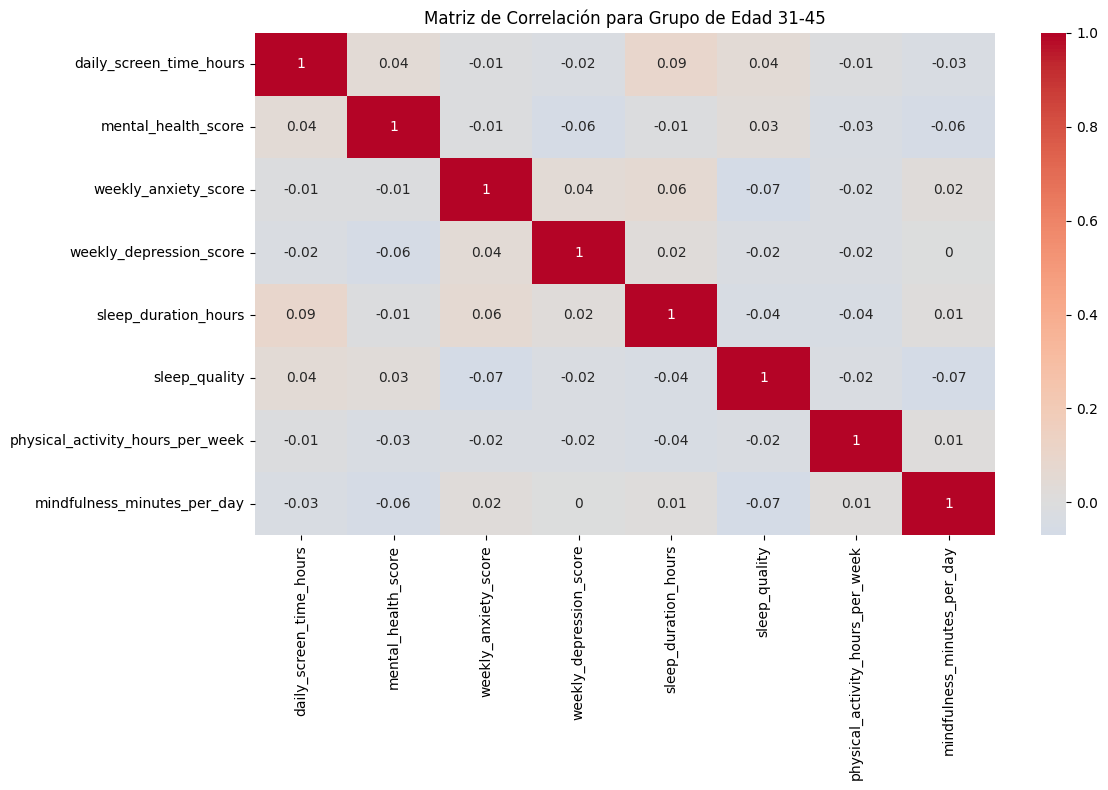

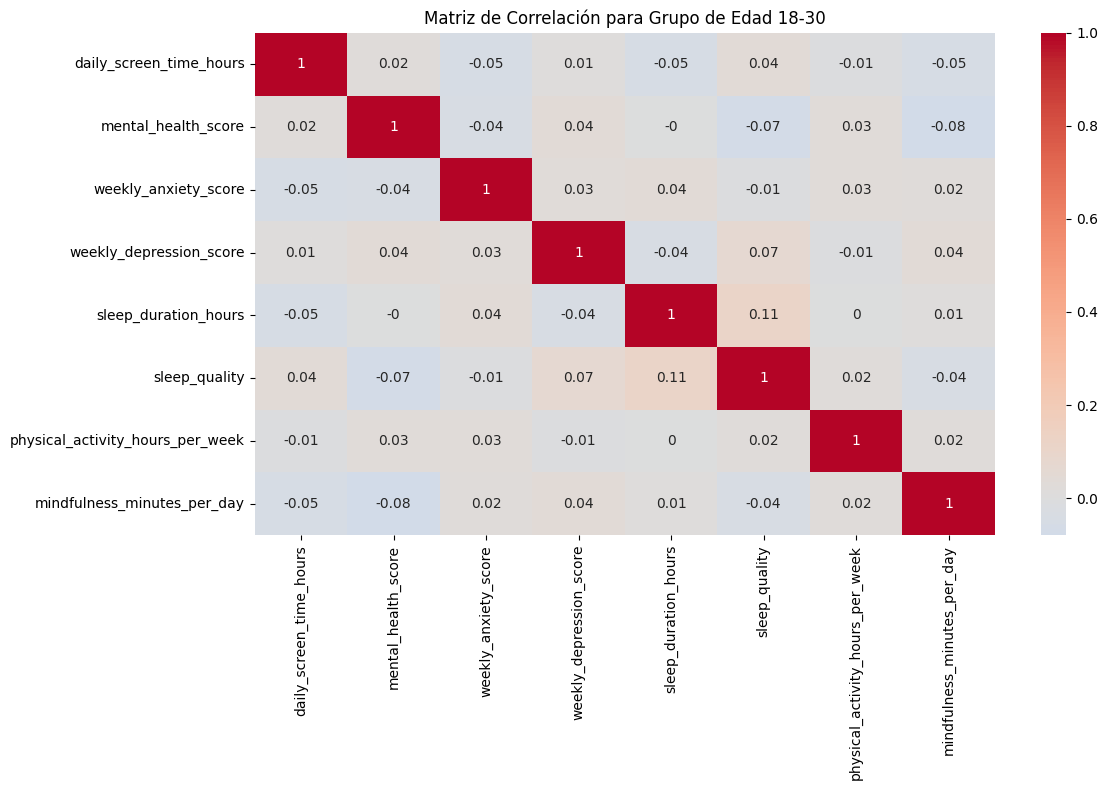

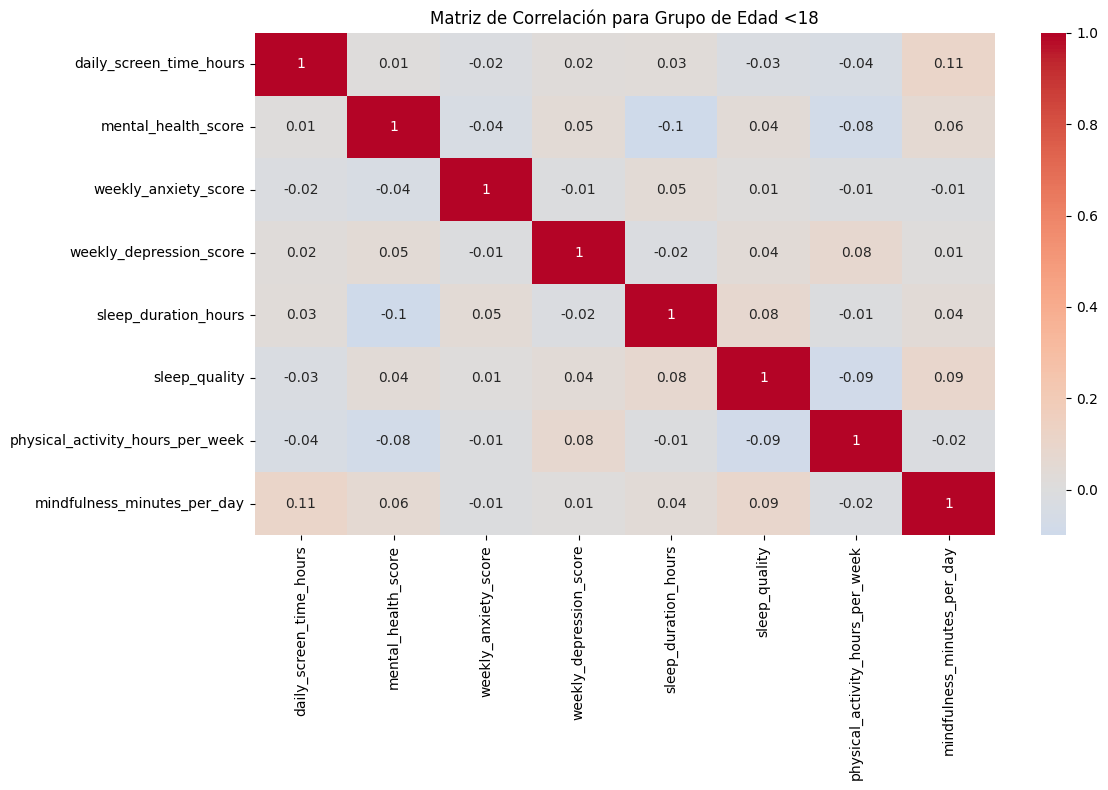

In [78]:
# Crear grupos de edad
df['age_group'] = pd.cut(df['age'], 
                        bins=[0, 18, 30, 45, 60, 100],
                        labels=['<18', '18-30', '31-45', '46-60', '>60'])

# Función para calcular correlaciones por grupo
def correlation_by_group(group_df):
    return group_df[variables].corr().round(2)

# Calcular correlaciones por grupo de edad
age_group_correlations = df.groupby('age_group').apply(correlation_by_group)

# Visualizar correlaciones para cada grupo de edad
for age_group in df['age_group'].unique():
    group_data = df[df['age_group'] == age_group]
    correlation_matrix = group_data[variables].corr().round(2)
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title(f'Matriz de Correlación para Grupo de Edad {age_group}')
    plt.tight_layout()
    plt.show()

In [79]:
# %% [markdown]
# ## 7. Resumen de Correlaciones Significativas
# 
# Presentaremos un resumen de las correlaciones más significativas encontradas.

In [80]:
#%%
print("=== Resumen de Correlaciones Significativas ===")

# Correlaciones con tiempo total de pantalla
print("\n1. Correlaciones con Tiempo Total de Pantalla:")
screen_time_correlations = correlation_matrix['daily_screen_time_hours'].sort_values(ascending=False)
print("\nCorrelaciones más fuertes:")
for var, corr in screen_time_correlations.items():
    if var != 'daily_screen_time_hours':
        print(f"- {var}: {corr:.2f}")

# Correlaciones con salud mental
print("\n2. Correlaciones con Salud Mental:")
mental_health_correlations = correlation_matrix['mental_health_score'].sort_values(ascending=False)
print("\nCorrelaciones más fuertes:")
for var, corr in mental_health_correlations.items():
    if var != 'mental_health_score':
        print(f"- {var}: {corr:.2f}")

# Correlaciones por tipo de uso
print("\n3. Correlaciones por Tipo de Uso:")
for device in screen_usage:
    device_corr = usage_correlations[device][mental_health].sort_values(ascending=False)
    print(f"\n{device}:")
    for var, corr in device_corr.items():
        print(f"- {var}: {corr:.2f}")

# Correlaciones por actividad
print("\n4. Correlaciones por Actividad:")
for activity in activities:
    activity_corr = activity_correlations[activity][mental_health].sort_values(ascending=False)
    print(f"\n{activity}:")
    for var, corr in activity_corr.items():
        print(f"- {var}: {corr:.2f}") 

=== Resumen de Correlaciones Significativas ===

1. Correlaciones con Tiempo Total de Pantalla:

Correlaciones más fuertes:
- mindfulness_minutes_per_day: 0.11
- sleep_duration_hours: 0.03
- weekly_depression_score: 0.02
- mental_health_score: 0.01
- weekly_anxiety_score: -0.02
- sleep_quality: -0.03
- physical_activity_hours_per_week: -0.04

2. Correlaciones con Salud Mental:

Correlaciones más fuertes:
- mindfulness_minutes_per_day: 0.06
- weekly_depression_score: 0.05
- sleep_quality: 0.04
- daily_screen_time_hours: 0.01
- weekly_anxiety_score: -0.04
- physical_activity_hours_per_week: -0.08
- sleep_duration_hours: -0.10

3. Correlaciones por Tipo de Uso:

phone_usage_hours:
- weekly_anxiety_score: 0.03
- mental_health_score: 0.01
- weekly_depression_score: -0.00

laptop_usage_hours:
- mental_health_score: 0.03
- weekly_anxiety_score: 0.00
- weekly_depression_score: 0.00

tablet_usage_hours:
- weekly_anxiety_score: 0.06
- mental_health_score: 0.05
- weekly_depression_score: 0.01

tv